## Chapter 2 [Diffraction](Ch3-_Diffraction.ipynb)


<hr style="height:1px;border-top:4px solid #FF8200" />
# Structure Factors

part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes



## Import numerical and plotting python packages

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook

# 3D plotting package used
from mpl_toolkits.mplot3d import Axes3D # 3D plotting 

# additional package 
import  itertools 
import scipy.constants as const

# Import libraries from the book
import pyTEMlib.KinsCat as ks         # Kinematic sCattering Library
                             # Atomic form factors from Kirklands book

Populating the interactive namespace from numpy and matplotlib
Using KinsCat library version  0.5  by G.Duscher
spglib not installed; Symmetry functions of spglib disabled
windows



## Define Silicon crystal

In [2]:
#Initialize the dictionary with all the input
tags = ks.structure_by_name('silicon')
print(tags['elements'])
print(tags['base'])

#Reciprocal Lattice 
# We use the linear algebra package of numpy to invert the unit_cell "matrix"
reciprocal_unit_cell = np.linalg.inv(tags['unit_cell']).T # transposed of inverted unit_cell


['Si']
['Si', 'Si', 'Si', 'Si', 'Si', 'Si', 'Si', 'Si']
[(0.0, 0.0, 0.0), (0.5, 0.0, 0.5), (0.5, 0.5, 0.0), (0.0, 0.5, 0.5), [0.25, 0.25, 0.25], [0.75, 0.25, 0.75], [0.75, 0.75, 0.25], [0.25, 0.75, 0.75]]


## Reciprocal Lattice 

In [3]:
#Reciprocal Lattice 
# We use the linear algebra package of numpy to invert the unit_cell "matrix"
reciprocal_lattice = np.linalg.inv(tags['unit_cell']).T # transposed of inverted unit_cell

print('reciprocal lattice\n',np.round(reciprocal_lattice,3))


reciprocal lattice
 [[1.764 0.    0.   ]
 [0.    1.764 0.   ]
 [0.    0.    1.764]]


# 2D Plot of Unit Cell in Reciprocal Space

<IPython.core.display.Javascript object>


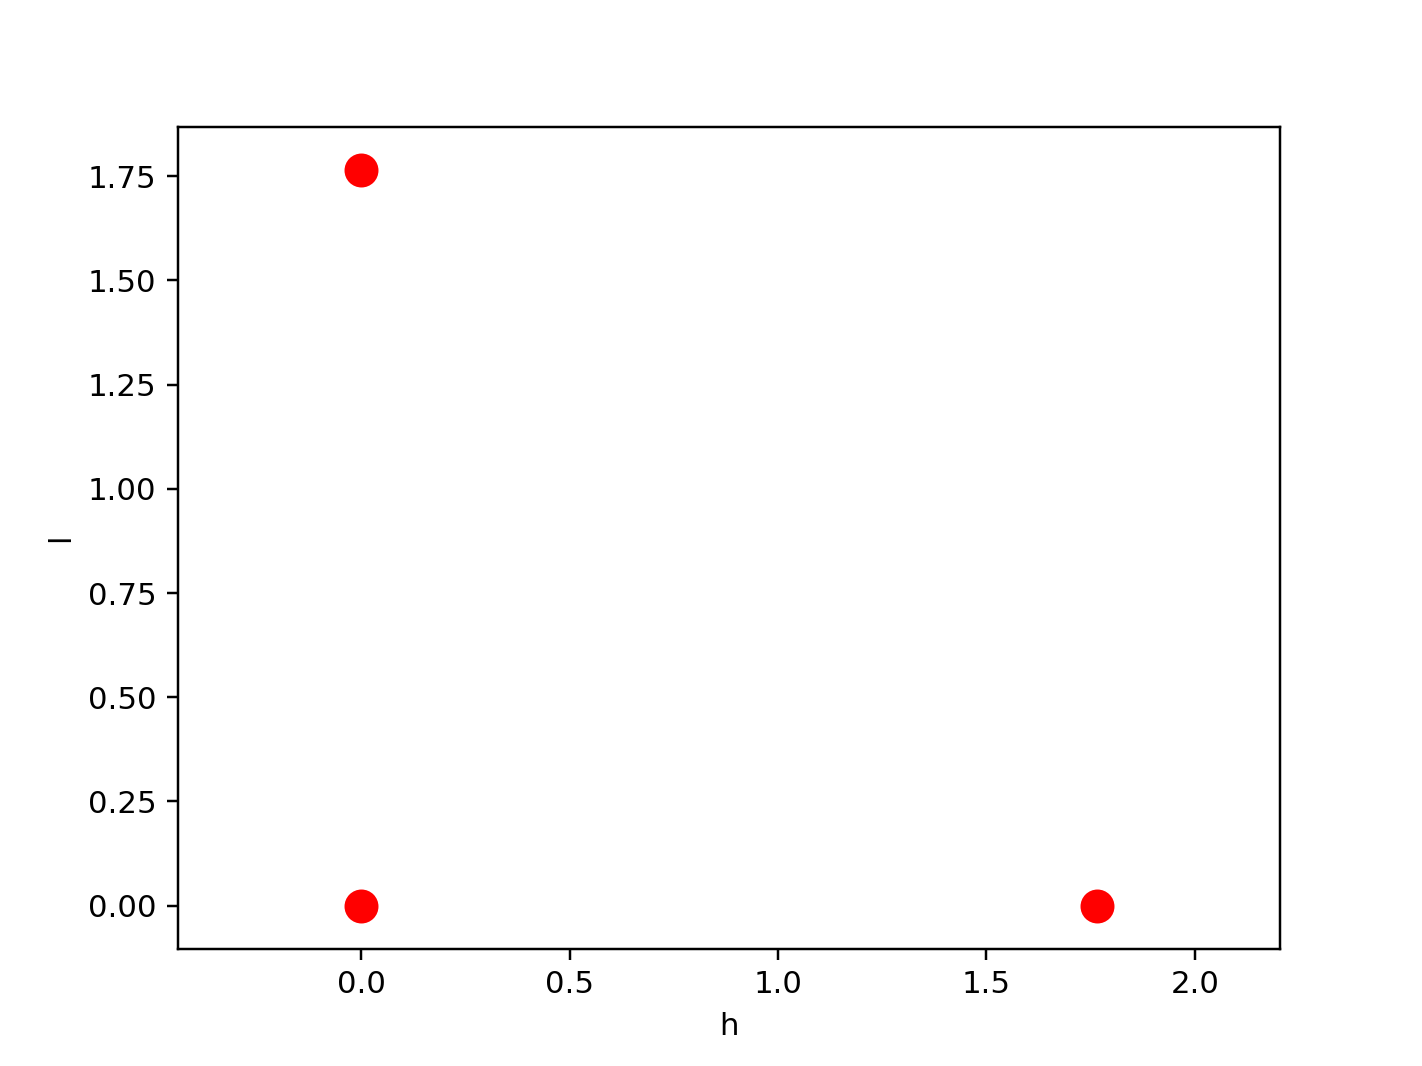

In [4]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(reciprocal_lattice[:,0], reciprocal_lattice[:,2], c='red', s=100)
plt.xlabel('h')
plt.ylabel('l')
ax.axis('equal');

## 3D Plot of Miller Indices

<IPython.core.display.Javascript object>


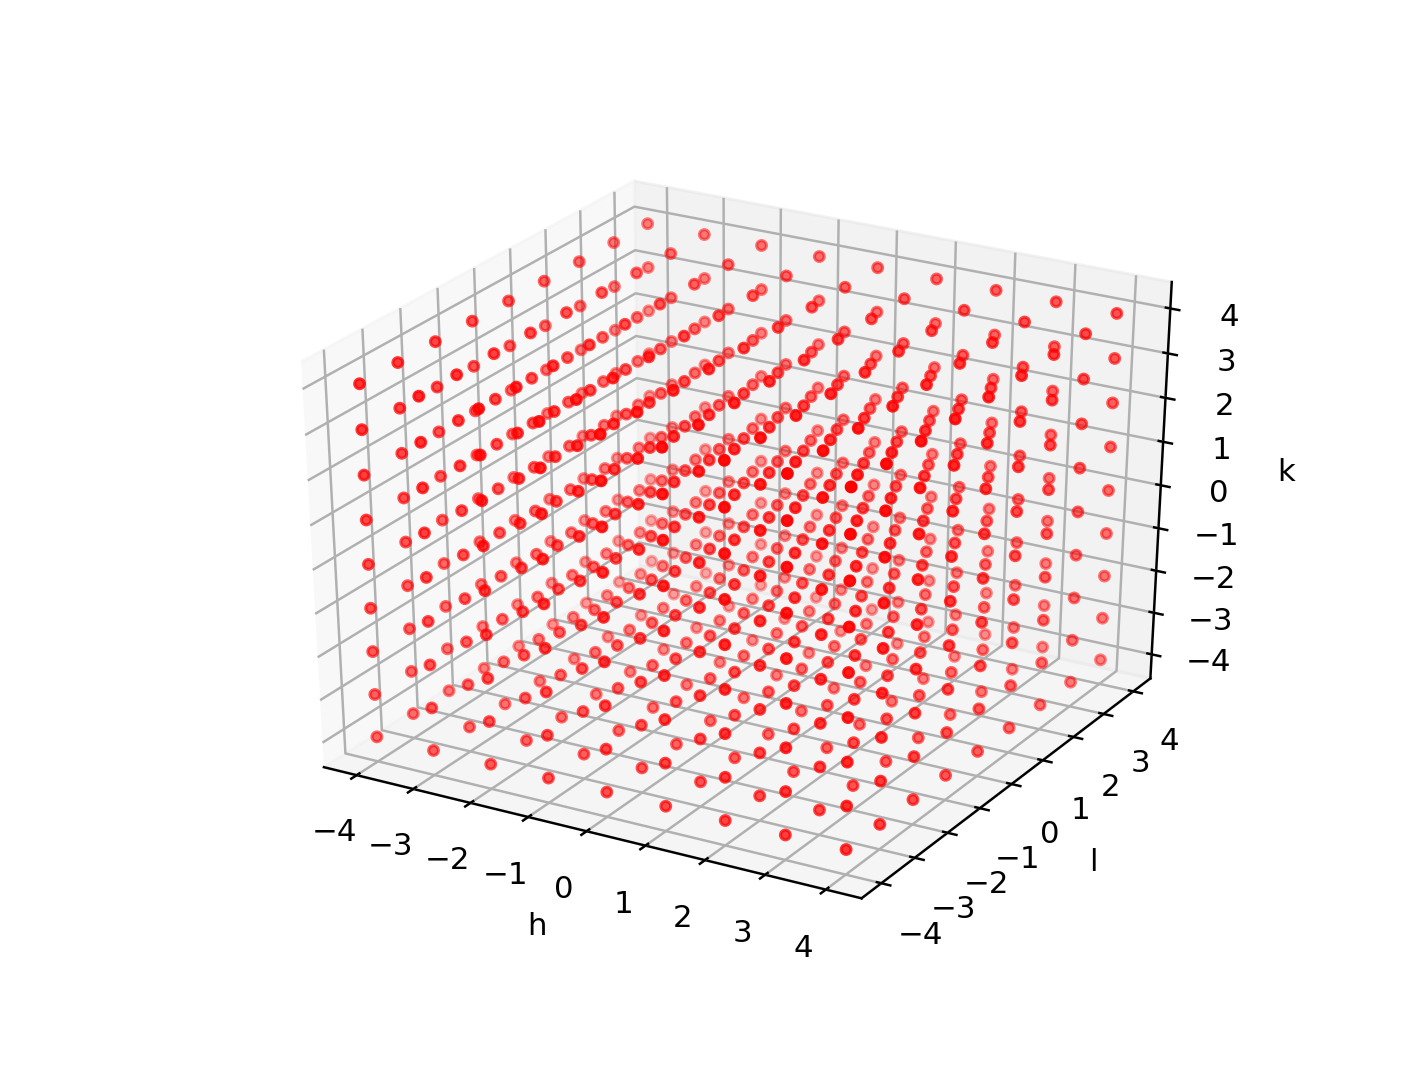

Text(0.5, 0, 'k')

In [8]:
hkl_max = 4
h  = np.linspace(-hkl_max,hkl_max,2*hkl_max+1)  # all evaluated single Miller Indices
hkl  = np.array(list(itertools.product(h,h,h) )) # all evaluated Miller indices

# Plot 2D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hkl[:,0], hkl[:,2], hkl[:,1], c='red', s=10)
plt.xlabel('h')
plt.ylabel('l')
fig.gca().set_zlabel('k')
#ax.set_aspect('equal')

## All Possible Reflections

(6859, 3) (6859, 3)


<IPython.core.display.Javascript object>


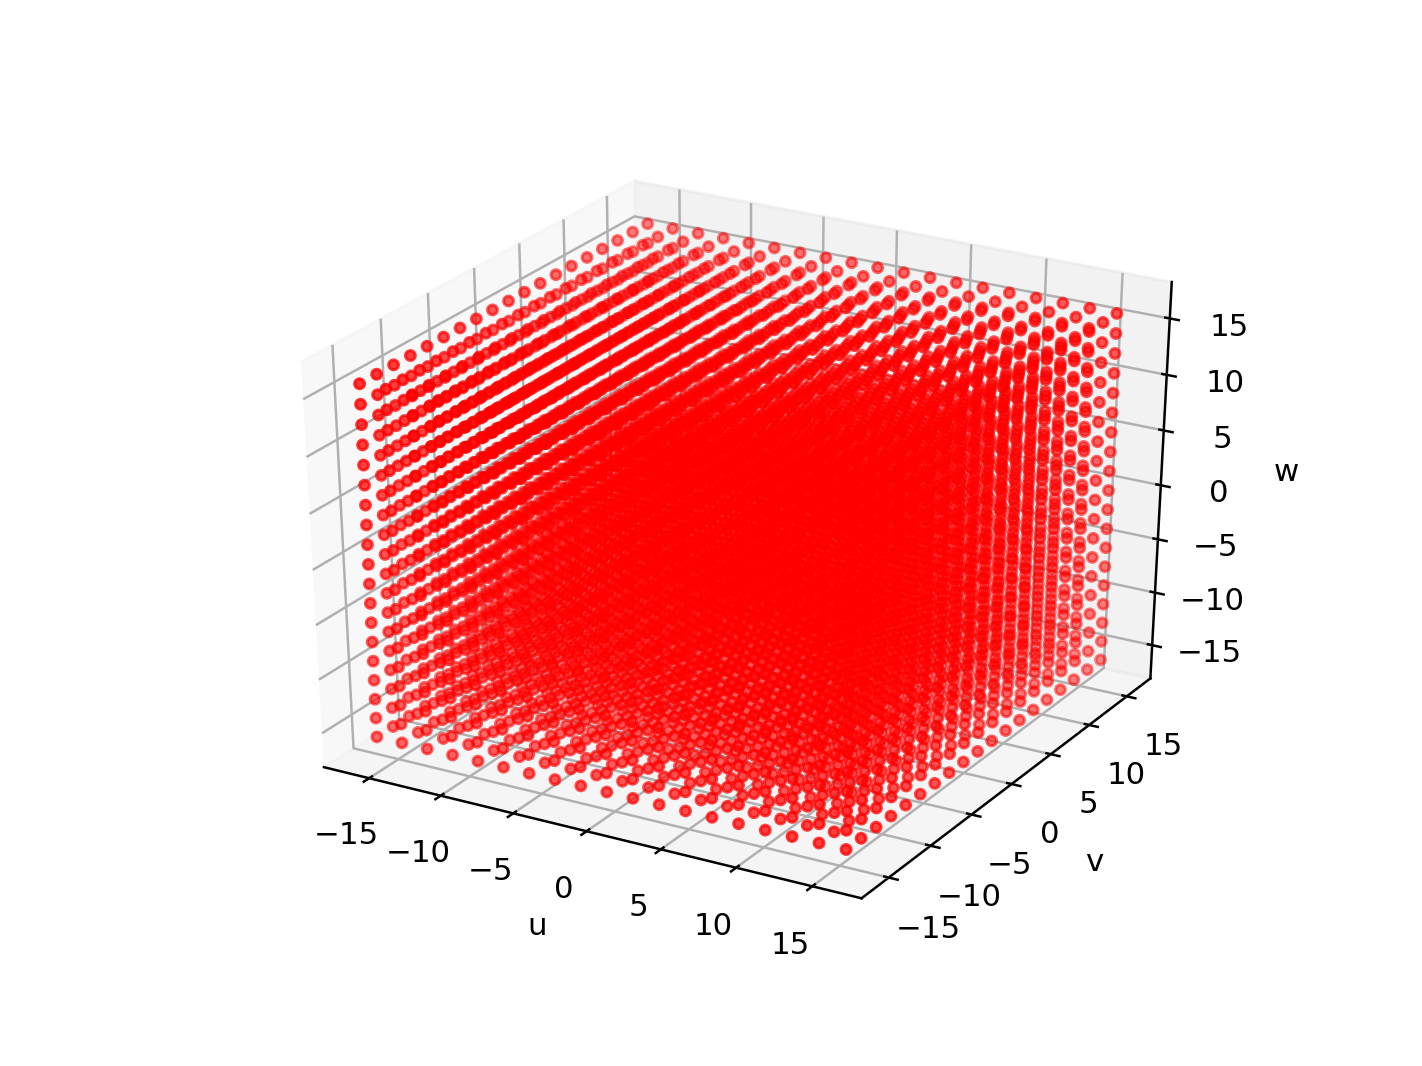

Text(0.5, 0, 'w')

In [10]:

hkl_max = 9#  maximum allowed Miller index


h  = np.linspace(-hkl_max,hkl_max,2*hkl_max+1)   # all evaluated single Miller Indices
hkl  = np.array(list(itertools.product(h,h,h) )) # all evaluated Miller indices
g_hkl = np.dot(hkl,reciprocal_unit_cell)               # all evaluated reciprocal lattice points

print(g_hkl.shape, hkl.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(g_hkl[:,0], g_hkl[:,2], g_hkl[:,1], c='red', s=10)
plt.xlabel('u')
plt.ylabel('v')
fig.gca().set_zlabel('w')


## Atomic form factor

If we look at the scattering power of a single atom that deflects an electron:
    
![Ewald Sphere](images/scattering_single_atom.jpg)

See [Atomic Form Factor](Atomic_Form_Factor.ipynb) for details

## Calculate Structure Factors 
$F_{hkl} = \sum_{j=1}^{N} f_j \mathrm{e}^{[-2 \pi i (h x_j + k y_j + l z_j)]}$

Please identify all the variables in line 10 below.

In [11]:
# Calculate Structure Factors

structure_factors = []

base = np.dot(tags['base'],tags['unit_cell'])  # transformation from relative to Carthesian coordinates
for j  in range(len(g_hkl)):
    F = 0
    for b in range(len(base)):
        f = ks.feq(tags['elements'][b],np.linalg.norm(g_hkl[j])) # Atomic form factor for element and momentum change (g vector)
        F += f * np.exp(-2*np.pi*1j*(g_hkl[j]*base[b]).sum())        
    structure_factors.append(F)
F = structure_factors = np.array(structure_factors)


## All Allowed Reflections

The structure factor determines whether a reflection is allowed or not.

If the structure factor is zero, the reflection is called forbidden.

In [12]:
# Allowed reflections have a non zero structure factor F (with a  bit of numerical error)
allowed = np.absolute(structure_factors) > 0.001

print(f' Of the evaluated {hkl.shape[0]} Miller indices {allowed.sum()} are allowed. ')

distances = np.linalg.norm(g_hkl, axis = 1)
# We select now all the 
zero = distances == 0.
allowed = np.logical_and(allowed,np.logical_not(zero))

F = F[allowed]
g_hkl = g_hkl[allowed]
hkl = hkl[allowed]
distances = distances[allowed]


 Of the evaluated 6859 Miller indices 1365 are allowed. 


## Families of reflections

reflections with the same length of reciprocal lattice vector are called families

In [13]:
sorted_allowed = np.argsort(distances)

distances = distances[sorted_allowed]
hkl = hkl[sorted_allowed]
F = F[sorted_allowed]

# How many have unique distances and what is their muliplicity

unique, indices  = np.unique(distances, return_index=True)

print(f' Of the {allowed.sum()} allowed Bragg reflections there are {len(unique)} families of reflections.')


 Of the 1364 allowed Bragg reflections there are 47 families of reflections.


## Intensities and Multiplicities


In [14]:
multiplicitity = np.roll(indices,-1)-indices
intensity = np.absolute(F[indices]**2*multiplicitity)
print('\n index \t     hkl \t 1/d [1/nm]     d [pm] \t  F \t multip. intensity' )
family = []
for j in range(len(unique)-1):
    i = indices[j]    
    i2 = indices[j+1]   
    family.append(hkl[i+np.argmax(hkl[i:i2].sum(axis=1))])
    print(f'{i:3g}\t {family[j]} \t  {distances[i]:.2f}  \t {1/distances[i]*1000:.0f} \t {np.absolute(F[i]):.2f}, \t  {indices[j+1]-indices[j]:3g} \t {intensity[j]:.2f}') 
    



 index 	     hkl 	 1/d [1/nm]     d [pm] 	  F 	 multip. intensity
  0	 [1. 1. 1.] 	  3.06  	 327 	 19.16, 	    8 	 2936.05
  8	 [0. 2. 2.] 	  4.99  	 200 	 15.77, 	   12 	 2983.44
 20	 [3. 1. 1.] 	  5.85  	 171 	 8.98, 	   24 	 1936.04
 44	 [0. 0. 4.] 	  7.06  	 142 	 9.75, 	    6 	 569.86
 50	 [3. 1. 3.] 	  7.69  	 130 	 6.09, 	   24 	 891.14
 74	 [2. 2. 4.] 	  8.64  	 116 	 7.29, 	   24 	 1276.32
 98	 [1. 5. 1.] 	  9.17  	 109 	 4.74, 	   24 	 540.01
122	 [3. 3. 3.] 	  9.17  	 109 	 4.74, 	    8 	 180.00
130	 [0. 4. 4.] 	  9.98  	 100 	 5.95, 	   12 	 425.49
142	 [3. 5. 1.] 	  10.44  	 96 	 3.96, 	   48 	 751.45
190	 [0. 2. 6.] 	  11.16  	 90 	 5.10, 	   24 	 625.14
214	 [3. 5. 3.] 	  11.57  	 86 	 3.43, 	   24 	 283.03
238	 [4. 4. 4.] 	  12.22  	 82 	 4.50, 	    8 	 162.23
246	 [5. 5. 1.] 	  12.60  	 79 	 3.05, 	   48 	 447.65
294	 [6. 2. 4.] 	  13.20  	 76 	 4.05, 	   48 	 786.33
342	 [5. 5. 3.] 	  13.55  	 74 	 2.76, 	   72 	 548.21
414	 [0. 8. 0.] 	  14.11  	 71 	 3.68, 	    6 	

## Allowed reflections for Silicon:   
$\ \ |F_{hkl}|^2 =  \begin{cases} (  h , k , l \ \ \mbox{ all odd} &\\
                    (  h ,| k , l \ \  \mbox{all even}& \mbox{and}\ \ h+k+l = 4n\end{cases}$ 

Check above allowed reflections whether this condition is met for the zero order Laue zone.


<IPython.core.display.Javascript object>


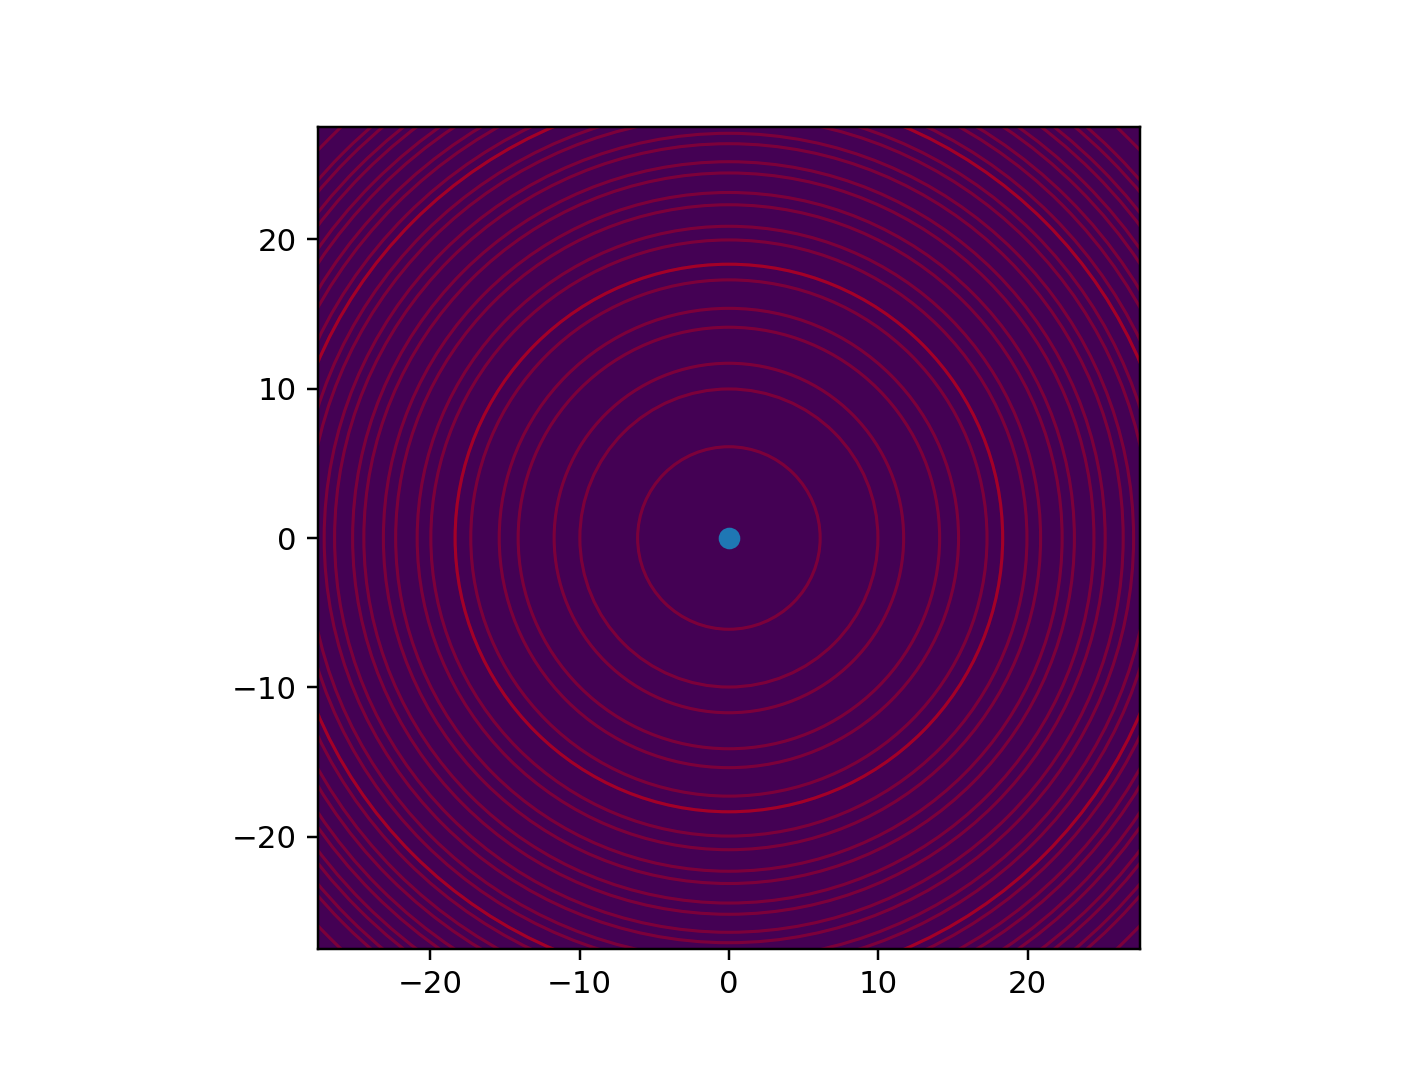

In [15]:
from matplotlib import patches
fig, ax = plt.subplots()
plt.scatter(0,0);
img = np.zeros((1024,1024))
extent = np.array([-1,1,-1,1])*np.max(unique)
plt.imshow(img, extent = extent)

for radius in unique:   
    circle = patches.Circle((0,0), radius*2, color='r', fill= False, alpha = 0.3)#, **kwargs)
    ax.add_artist(circle);


## Conclusion
The scattering geometry provides all the tools to determine which reciprocal lattice points are possible and which of them are allowed.

Next we need to transfer out knowledge into a  diffraction pattern.

## Back: [Basic Crystallography](CH2-Basic_Crystallography.ipynb)
## Next: [Analyzing Ring Diffraction Pattern](CH2-Diffraction-Rings.ipynb)
## Chapter 2: [Diffraction](CH2_Diffraction.ipynb)
## List of Content: [Front](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)
